In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading sample submission 
sub=pd.read_csv('sample_submission.csv')
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [3]:
#reading test data
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#no.rows and columns in test data
test.shape

(1459, 80)

In [5]:
#read train data
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#no.rows and columns in train data  
train.shape

(1460, 81)

We notice that the train dataset has 81 columns and test dataset has 80 columns

In [7]:
#Finding the missing column
set(train.columns)-set(test.columns)       

{'SalePrice'}

We can observe that the missing column in test dataset is salesprice which is present in train dataset

In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
#train.dropna(subset=['GarageYrBlt'],inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
train['Alley'].fillna('None',inplace=True)
train['Utilities'].fillna('None',inplace=True)
train['LotConfig'].fillna('None',inplace=True) 
train['Exterior1st'].fillna('None',inplace=True)
train['Exterior2nd'].fillna('None',inplace=True)
train['MasVnrType'].fillna('None',inplace=True)
train['BsmtQual'].fillna('None',inplace=True)
train['BsmtCond'].fillna('None',inplace=True)
train['BsmtExposure'].fillna('None',inplace=True)
train['BsmtFinType1'].fillna('None',inplace=True)
train['BsmtFinType2'].fillna('None',inplace=True)
train['Functional'].fillna('None',inplace=True)
train['FireplaceQu'].fillna('None',inplace=True)
train['GarageType'].fillna('None',inplace=True)
train['GarageFinish'].fillna('None',inplace=True)
train['GarageQual'].fillna('None',inplace=True)
train['GarageCond'].fillna('None',inplace=True)
train['PoolQC'].fillna('None',inplace=True)
train['Fence'].fillna('None',inplace=True)
train['MiscFeature'].fillna('None',inplace=True)
train['Electrical'].fillna('None',inplace=True)
train['SaleType'].fillna('None',inplace=True)
train['MSZoning'].fillna('None',inplace=True)

In [13]:
null_list=train.isnull().sum()
null_list[null_list>=1]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
#Assuming zero lot line for lotfrontage 
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)

In [15]:
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)

In [16]:
pd.set_option('display.max_rows',None)


In [17]:
test['Alley'].fillna('None',inplace=True)
test['Utilities'].fillna('None',inplace=True)
test['LotConfig'].fillna('None',inplace=True) 
test['Exterior1st'].fillna('None',inplace=True)
test['Exterior2nd'].fillna('None',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)
test['BsmtQual'].fillna('None',inplace=True)
test['BsmtCond'].fillna('None',inplace=True)
test['BsmtExposure'].fillna('None',inplace=True)
test['BsmtFinType1'].fillna('None',inplace=True)
test['BsmtFinType2'].fillna('None',inplace=True)
test['Functional'].fillna('None',inplace=True)
test['FireplaceQu'].fillna('None',inplace=True)
test['GarageType'].fillna('None',inplace=True)
test['GarageFinish'].fillna('None',inplace=True)
test['GarageQual'].fillna('None',inplace=True)
test['GarageCond'].fillna('None',inplace=True)
test['PoolQC'].fillna('None',inplace=True)
test['Fence'].fillna('None',inplace=True)
test['MiscFeature'].fillna('None',inplace=True)
test['Electrical'].fillna('None',inplace=True)
test['SaleType'].fillna('None',inplace=True)
test['MSZoning'].fillna('None',inplace=True)

In [18]:
#test.dropna(subset=['GarageYrBlt'],inplace=True)

In [19]:
test.isnull().sum()[test.isnull().sum()>1]

LotFrontage     227
MasVnrArea       15
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
dtype: int64

In [20]:
test['BsmtFullBath'].fillna(0,inplace=True)
test['BsmtHalfBath'].fillna(0,inplace=True)

In [21]:
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(),inplace=True)

In [22]:
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)

In [23]:
pd.set_option('display.max_columns',None)
train.drop('Id',axis=1).corr()[(train.drop('Id',axis=1).corr()>0.5) | (train.drop('Id',axis=1).corr()<-0.5)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.547766,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
train.drop('Id',axis=1).corr()[(train.drop('Id',axis=1).corr()>=0.1) & (train.drop('Id',axis=1).corr()<0.5)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.307886,NaN,NaN,NaN,NaN,0.131608,0.177354,NaN,0.281721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,0.306795,0.234196,NaN,0.117598,NaN,0.179283,0.215828,NaN,0.122156,0.363358,0.414266,NaN,NaN,0.368392,NaN,NaN,0.180424,NaN,0.237023,NaN,0.320146,0.235755,NaN,0.269729,0.323663,NaN,0.137454,NaN,NaN,NaN,0.180868,NaN,NaN,NaN,0.334901
LotArea,NaN,0.306795,NaN,0.105806,NaN,NaN,NaN,0.103960,0.214103,0.111170,NaN,0.260833,0.299475,NaN,NaN,0.263116,0.158155,NaN,0.126031,NaN,0.119690,NaN,0.190015,0.271364,NaN,0.154871,0.180403,0.171698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263843
OverallQual,NaN,0.234196,0.105806,NaN,NaN,NaN,NaN,0.410238,0.239666,NaN,0.308159,NaN,0.476224,0.295493,NaN,NaN,0.111098,NaN,NaN,0.273458,0.101676,NaN,0.427452,0.396765,NaN,NaN,NaN,0.238923,0.308819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,0.117598,NaN,NaN,NaN,NaN,NaN,0.314745,0.249503,NaN,0.149040,0.391452,0.281986,NaN,NaN,0.199010,0.187599,NaN,0.468271,0.242656,NaN,NaN,NaN,0.147716,NaN,NaN,0.478954,0.224880,0.188686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179186,0.128451,NaN,0.181133,0.291066,0.240379,0.140024,NaN,0.287389,0.119470,NaN,0.439046,0.183331,NaN,NaN,0.191740,0.112581,NaN,0.420622,0.371600,0.205726,0.226298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,0.179283,0.103960,0.410238,NaN,0.314745,0.179186,NaN,0.263582,NaN,0.114184,0.362452,0.342160,0.174019,NaN,0.389893,NaN,NaN,0.275730,0.200802,0.102417,NaN,0.280027,0.247906,0.251794,0.363778,0.372567,0.159349,0.124965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475241
BsmtFinSF1,NaN,0.215828,0.214103,0.239666,NaN,0.249503,0.128451,0.263582,NaN,NaN,NaN,NaN,0.445863,NaN,NaN,0.208171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,NaN,NaN,NaN,0.140491,NaN,NaN,NaN,0.386420
BsmtFinSF2,NaN,NaN,0.111170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104810,NaN,NaN,NaN,NaN,0.158678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
train.drop('Id',axis=1).corr()[(train.drop('Id',axis=1).corr()>=0.1)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.307886,NaN,NaN,NaN,NaN,0.131608,0.177354,NaN,0.281721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.000000,0.306795,0.234196,NaN,0.117598,NaN,0.179283,0.215828,NaN,0.122156,0.363358,0.414266,NaN,NaN,0.368392,NaN,NaN,0.180424,NaN,0.237023,NaN,0.320146,0.235755,NaN,0.269729,0.323663,NaN,0.137454,NaN,NaN,NaN,0.180868,NaN,NaN,NaN,0.334901
LotArea,NaN,0.306795,1.000000,0.105806,NaN,NaN,NaN,0.103960,0.214103,0.111170,NaN,0.260833,0.299475,NaN,NaN,0.263116,0.158155,NaN,0.126031,NaN,0.119690,NaN,0.190015,0.271364,NaN,0.154871,0.180403,0.171698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263843
OverallQual,NaN,0.234196,0.105806,1.000000,NaN,0.572323,0.550684,0.410238,0.239666,NaN,0.308159,0.537808,0.476224,0.295493,NaN,0.593007,0.111098,NaN,0.550600,0.273458,0.101676,NaN,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,0.117598,NaN,0.572323,NaN,1.000000,0.592855,0.314745,0.249503,NaN,0.149040,0.391452,0.281986,NaN,NaN,0.199010,0.187599,NaN,0.468271,0.242656,NaN,NaN,NaN,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,0.179186,0.128451,NaN,0.181133,0.291066,0.240379,0.140024,NaN,0.287389,0.119470,NaN,0.439046,0.183331,NaN,NaN,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,0.179283,0.103960,0.410238,NaN,0.314745,0.179186,1.000000,0.263582,NaN,0.114184,0.362452,0.342160,0.174019,NaN,0.389893,NaN,NaN,0.275730,0.200802,0.102417,NaN,0.280027,0.247906,0.251794,0.363778,0.372567,0.159349,0.124965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475241
BsmtFinSF1,NaN,0.215828,0.214103,0.239666,NaN,0.249503,0.128451,0.263582,1.000000,NaN,NaN,0.522396,0.445863,NaN,NaN,0.208171,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,NaN,NaN,NaN,0.140491,NaN,NaN,NaN,0.386420
BsmtFinSF2,NaN,NaN,0.111170,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.104810,NaN,NaN,NaN,NaN,0.158678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


High correlation with salesprice(>0.5):
OverallQual,YearBuilt,YeaRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea

Medium correlation with salesprice(>0.1):
LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF

Garageblt and yrblt--0.8
overallqual--all garage features,YearRemodAdd,YearBuilt,TotalBsmtSF,GrLivArea--0.5
YearRemodAdd-yrblt--0.6
TotalBsmtSF-1stFlrSF--0.8
garagearea-garagecars--0.8
garagearea-overallqual
GrLivArea-TotRmsAbvGrd--0.8

In [26]:
#Feature selection
train_features=train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','HalfBath','BedroomAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF','YearBuilt','YearRemodAdd','OverallQual','GrLivArea','TotalBsmtSF','SalePrice']]
test_features=test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','HalfBath','BedroomAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF','YearBuilt','YearRemodAdd','OverallQual','GrLivArea','TotalBsmtSF']]

<AxesSubplot:>

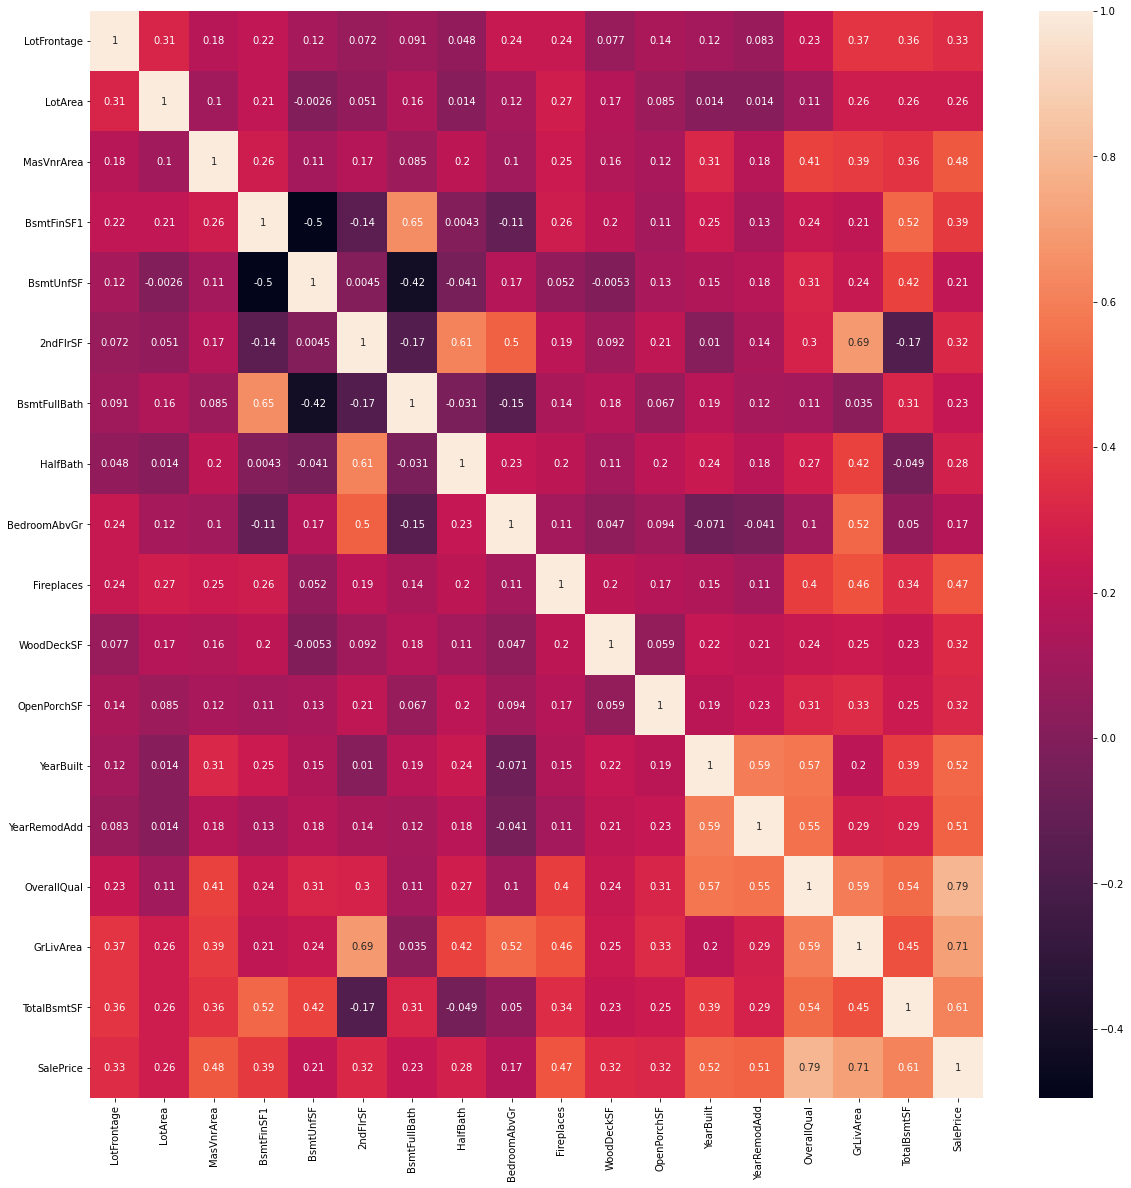

In [27]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(train_features.corr(),annot=True)

In [28]:
x=train_features.drop(['SalePrice'],axis=1)

In [29]:
y=train_features['SalePrice']

In [30]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
x_train.shape

(1168, 17)

In [32]:
y_train.shape

(1168,)

In [33]:
x_test.shape

(292, 17)

In [34]:
y_test.shape

(292,)

In [35]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()

In [36]:
rf=RF.fit(x_train,y_train)

In [37]:
rf.score(x_test,y_test)

0.8847843418359874

In [38]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(x_train,y_train)
model.score(x_test,y_test)

0.8135503529934465

In [40]:
from sklearn.linear_model import Lasso
np.random.seed(42)
lasso=Lasso()
model=lasso.fit(x_train,y_train)
model.score(x_test,y_test)

0.8135531579993566

In [42]:
from sklearn.linear_model import ElasticNet
np.random.seed(42)
E_Net=ElasticNet()
E_Net_model=E_Net.fit(x_train,y_train)
E_Net_model.score(x_test,y_test)
#y_E_Net_model_predict=E_Net_model.predict(x_test)

0.8111911313240896

#### Saving random forest model

In [43]:
import pickle
pkl_write=pickle.dump(rf,open("random_forest_boston.pkl","wb"))

In [45]:
pkl_read=pickle.load(open("random_forest_boston.pkl","rb"))
y1=pkl_read.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score=r2_score(y_test,y1)
mae=mean_absolute_error(y_test,y1)
mse=mean_squared_error(y_test,y1)


In [49]:
r2_score

0.8847843418359874

In [50]:
mae

18823.116210045664

In [51]:
mse

883741682.2937392